In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:\\Users\\Sagar\\Downloads\\archive (1)\\pixar_movies.csv')

# Display first few rows to understand the structure
print(df.head())


            movie date_released  year_released  length_min  \
0       Toy Story    1995-11-22           1995          81   
1    A Bug's Life    1998-11-25           1998          95   
2     Toy Story 2    1999-11-24           1999          92   
3  Monsters, Inc.    2001-11-02           2001          92   
4    Finding Nemo    2003-05-30           2003         100   

                                        plot_summary  \
0  A group of toys, headed by Woody, a pull-strin...   
1  A misfit ant named Flik teams up with a group ...   
2  When Woody is stolen by a toy collector, Buzz ...   
3  In a world where monsters generate energy by s...   
4  A clownfish named Marlin embarks on a journey ...   

                                       director  \
0                                 John Lasseter   
1  John Lasseter, co-directed by Andrew Stanton   
2       John Lasseter, Ash Brannon, Lee Unkrich   
3     Pete Docter, David Silverman, Lee Unkrich   
4                   Andrew Stanton,

In [2]:
df['imdb_rating'] = pd.to_numeric(
    df['imdb_rating'].str.split('/').str[0], errors='coerce'
)

In [3]:
print(df.columns)

Index(['movie', 'date_released', 'year_released', 'length_min', 'plot_summary',
       'director', 'writer', 'main_characters', 'type_of_characters',
       'main_voice_actors', 'opening_weekend_box_office_sales',
       'total_worldwide_gross_sales', 'rotten_tomatoes_rating', 'imdb_rating',
       'movie_genre', 'movie_rating'],
      dtype='object')


In [4]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [5]:
# Check the updated column names
print(df.columns)

Index(['movie', 'date_released', 'year_released', 'length_min', 'plot_summary',
       'director', 'writer', 'main_characters', 'type_of_characters',
       'main_voice_actors', 'opening_weekend_box_office_sales',
       'total_worldwide_gross_sales', 'rotten_tomatoes_rating', 'imdb_rating',
       'movie_genre', 'movie_rating'],
      dtype='object')


In [6]:
# Preview the data in the sales columns
print(df[['opening_weekend_box_office_sales', 'total_worldwide_gross_sales']].head())

  opening_weekend_box_office_sales total_worldwide_gross_sales
0                    $29.1 million              $394.4 million
1                    $33.3 million              $363.3 million
2                    $57.4 million              $511.3 million
3                    $62.5 million              $577.4 million
4                    $70.6 million              $941.6 million


In [7]:
def convert_to_numeric(value):
    value = value.strip().lower()  # Remove spaces and make lowercase
    value = value.replace('$', '').replace(',', '')  # Remove '$' and ','

    if 'million' in value:
        value = float(value.replace('million', '').strip()) * 1e6
    elif 'billion' in value:
        value = float(value.replace('billion', '').strip()) * 1e9
    else:
        try:
            value = float(value)
        except ValueError:
            return None  # Return None if conversion fails
    return value

In [8]:
# # Apply the function to clean and convert the columns
df['opening_weekend_box_office_sales'] = df['opening_weekend_box_office_sales'].apply(convert_to_numeric)


In [9]:
df['total_worldwide_gross_sales'] = df['total_worldwide_gross_sales'].apply(convert_to_numeric)

In [10]:
# # Check the cleaned data
print(df[['opening_weekend_box_office_sales', 'total_worldwide_gross_sales']].head())

   opening_weekend_box_office_sales  total_worldwide_gross_sales
0                        29100000.0                  394400000.0
1                        33300000.0                  363300000.0
2                        57400000.0                  511300000.0
3                        62500000.0                  577400000.0
4                        70600000.0                  941600000.0


In [11]:
invalid_rows = df[
    df['opening_weekend_box_office_sales'].isnull() | df['total_worldwide_gross_sales'].isnull()
]
print(invalid_rows[['movie', 'opening_weekend_box_office_sales', 'total_worldwide_gross_sales']])

          movie  opening_weekend_box_office_sales  total_worldwide_gross_sales
22         Soul                               NaN                  121600000.0
23         Luca                               NaN                   51100000.0
24  Turning Red                               NaN                   21800000.0


In [12]:
# Option 1: Fill missing values with 0
df.fillna({'opening_weekend_box_office_sales': 0, 'total_worldwide_gross_sales': 0}, inplace=True)
print(df[['opening_weekend_box_office_sales', 'total_worldwide_gross_sales']].head(24))
# Option 2: Drop rows with missing data
# df.dropna(subset=['opening_weekend_box_office_sales', 'total_worldwide_gross_sales'], inplace=True)

    opening_weekend_box_office_sales  total_worldwide_gross_sales
0                         29100000.0                 3.944000e+08
1                         33300000.0                 3.633000e+08
2                         57400000.0                 5.113000e+08
3                         62500000.0                 5.774000e+08
4                         70600000.0                 9.416000e+08
5                         70500000.0                 6.316000e+08
6                         60100000.0                 4.620000e+08
7                         47200000.0                 6.237000e+08
8                         63100000.0                 5.325000e+08
9                         68100000.0                 7.351000e+08
10                       110300000.0                 1.067000e+09
11                        66100000.0                 5.621000e+08
12                        66700000.0                 5.390000e+08
13                        82400000.0                 7.436000e+08
14        

In [13]:
invalid_rows = df[
    df['opening_weekend_box_office_sales'].isnull() | df['total_worldwide_gross_sales'].isnull()
]
print(invalid_rows[['movie', 'opening_weekend_box_office_sales', 'total_worldwide_gross_sales']])

Empty DataFrame
Columns: [movie, opening_weekend_box_office_sales, total_worldwide_gross_sales]
Index: []


In [14]:
df['Profit'] = df['total_worldwide_gross_sales'] - df['opening_weekend_box_office_sales']

# Preview the new column
print(df[['movie', 'Profit']].head())

            movie       Profit
0       Toy Story  365300000.0
1    A Bug's Life  330000000.0
2     Toy Story 2  453900000.0
3  Monsters, Inc.  514900000.0
4    Finding Nemo  871000000.0


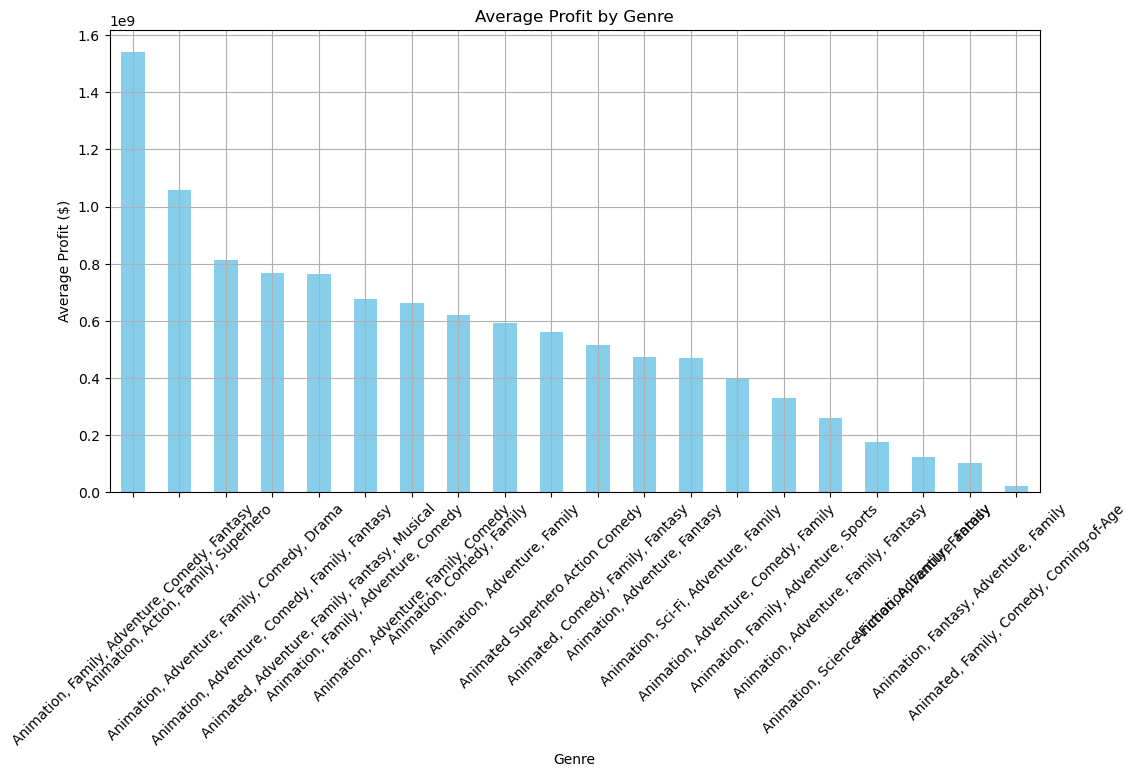

In [15]:
# Group by Genre and calculate average profit
genre_profit = df.groupby('movie_genre')['Profit'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
genre_profit.plot(kind='bar', color='skyblue')
plt.title('Average Profit by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

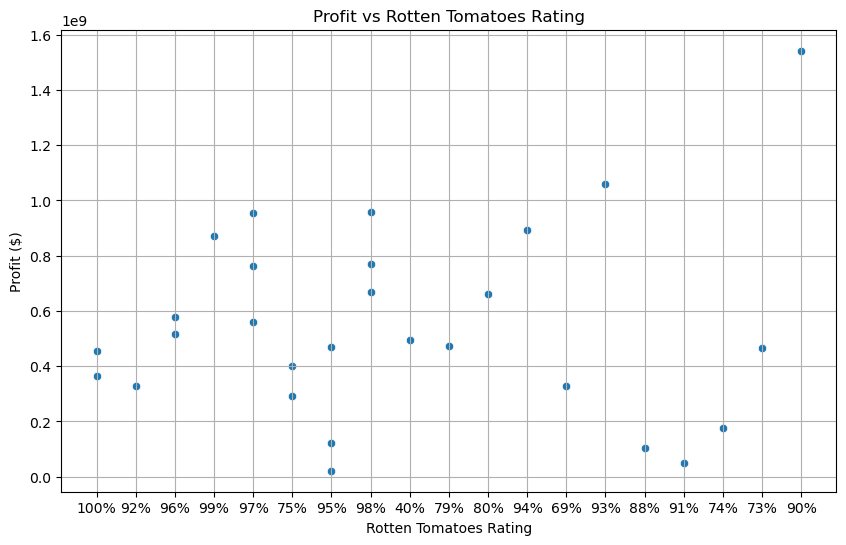

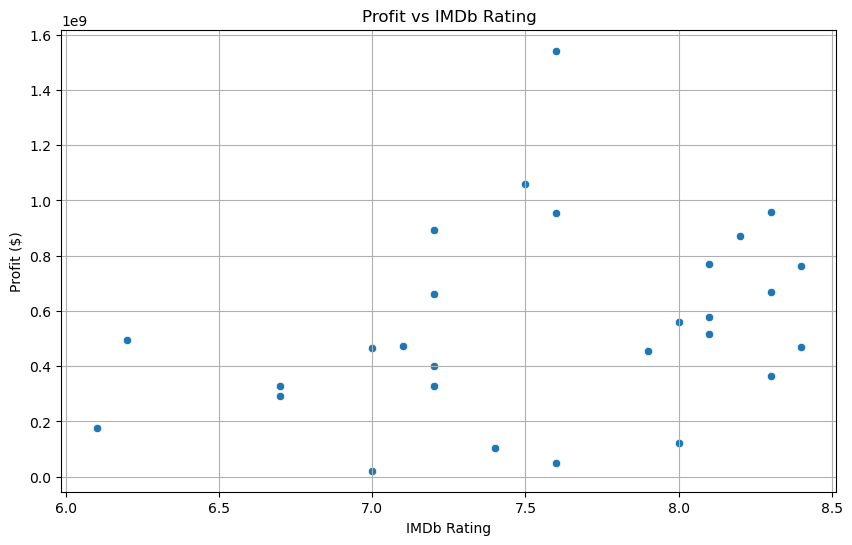

In [16]:
# Scatter plot for Rotten Tomatoes Rating vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rotten_tomatoes_rating', y='Profit')
plt.title('Profit vs Rotten Tomatoes Rating')
plt.xlabel('Rotten Tomatoes Rating')
plt.ylabel('Profit ($)')
plt.grid()
plt.show()

# Scatter plot for IMDb Rating vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imdb_rating', y='Profit')
plt.title('Profit vs IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Profit ($)')
plt.grid()
plt.show()

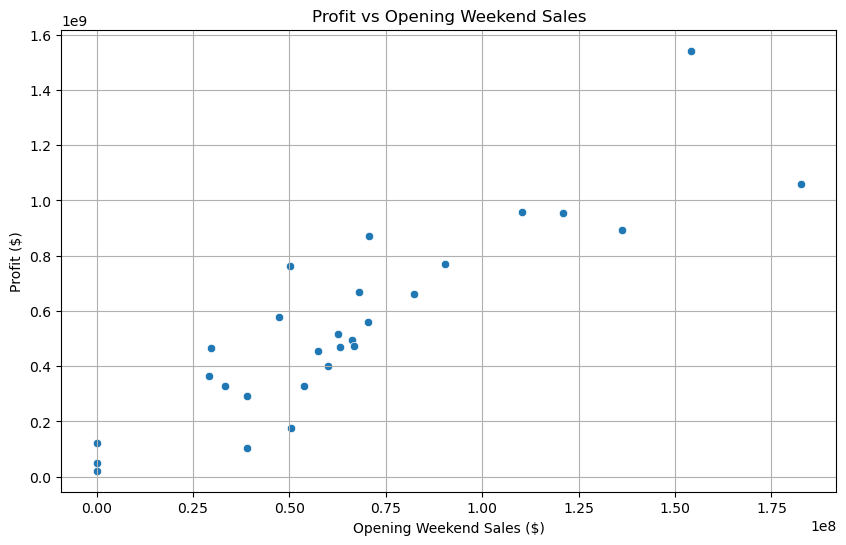

In [17]:
# Scatter plot for Opening Weekend Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='opening_weekend_box_office_sales', y='Profit')
plt.title('Profit vs Opening Weekend Sales')
plt.xlabel('Opening Weekend Sales ($)')
plt.ylabel('Profit ($)')
plt.grid()
plt.show()

In [18]:
# Sort movies by Profit and display the top 5
top_movies = df[['movie', 'Profit']].sort_values(by='Profit', ascending=False).head(5)
print("Top 5 Most Profitable Movies:")
print(top_movies)

Top 5 Most Profitable Movies:
            movie        Profit
27   Inside Out 2  1.541800e+09
19  Incredibles 2  1.059300e+09
10    Toy Story 3  9.567000e+08
20    Toy Story 4  9.530000e+08
16   Finding Dory  8.928000e+08


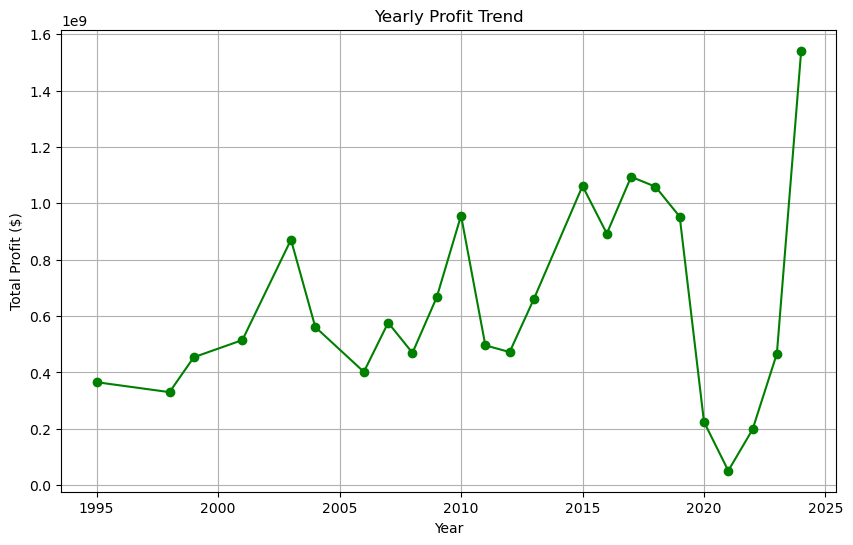

In [19]:
# Group by Year and calculate total profits
yearly_profit = df.groupby('year_released')['Profit'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_profit.index, yearly_profit.values, marker='o', color='green')
plt.title('Yearly Profit Trend')
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.grid()
plt.show()

In [20]:
# Check for non-numeric values in the relevant columns
for column in ['Profit', 'rotten_tomatoes_rating', 'imdb_rating',
               'opening_weekend_box_office_sales', 'total_worldwide_gross_sales']:
    print(f"Non-numeric values in {column}:")
    print(df[column][~df[column].apply(lambda x: isinstance(x, (int, float)))])
    

Non-numeric values in Profit:
Series([], Name: Profit, dtype: float64)
Non-numeric values in rotten_tomatoes_rating:
0     100%
1      92%
2     100%
3      96%
4      99%
5      97%
6      75%
7      96%
8      95%
9      98%
10     98%
11     40%
12     79%
13     80%
14     98%
15     75%
16     94%
17     69%
18     97%
19     93%
20     97%
21     88%
22     95%
23     91%
24     95%
25     74%
26     73%
27     90%
Name: rotten_tomatoes_rating, dtype: object
Non-numeric values in imdb_rating:
Series([], Name: imdb_rating, dtype: float64)
Non-numeric values in opening_weekend_box_office_sales:
Series([], Name: opening_weekend_box_office_sales, dtype: float64)
Non-numeric values in total_worldwide_gross_sales:
Series([], Name: total_worldwide_gross_sales, dtype: float64)


In [21]:
#  df['imdb_rating'] = pd.to_numeric(
#     df['imdb_rating'].str.split('/').str[0], errors='coerce'
# )



In [22]:
# Clean 'rotten_tomatoes_rating' column (remove % and convert to float)
df['rotten_tomatoes_rating'] = (
    df['rotten_tomatoes_rating']
    .str.replace('%', '', regex=False)  # Remove the '%' symbol
    .astype(float)  # Convert to float
)
 
print(df[['opening_weekend_box_office_sales', 'total_worldwide_gross_sales']].head())
# Ensure 'imdb_rating' is numeric
# df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')

# Clean financial columns (remove '$', ',' and handle 'million', 'billion')
def convert_financial(value):
    try:
        value = value.lower().replace('$', '').replace(',', '')
        if 'million' in value:
            return float(value.replace('million', '').strip()) * 1e6
        elif 'billion' in value:
            return float(value.replace('billion', '').strip()) * 1e9
        else:
            return float(value)
    except Exception:
        return None  # Handle unexpected formats

# df['opening_weekend_box_office_sales'] = df['opening_weekend_box_office_sales'].apply(convert_financial)
# df['total_worldwide_gross_sales'] = df['total_worldwide_gross_sales'].apply(convert_financial)
print(df[['opening_weekend_box_office_sales', 'total_worldwide_gross_sales']].head())

# Ensure 'Profit' is numeric
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')


   opening_weekend_box_office_sales  total_worldwide_gross_sales
0                        29100000.0                  394400000.0
1                        33300000.0                  363300000.0
2                        57400000.0                  511300000.0
3                        62500000.0                  577400000.0
4                        70600000.0                  941600000.0
   opening_weekend_box_office_sales  total_worldwide_gross_sales
0                        29100000.0                  394400000.0
1                        33300000.0                  363300000.0
2                        57400000.0                  511300000.0
3                        62500000.0                  577400000.0
4                        70600000.0                  941600000.0


In [23]:
# Fill NaN values with 0 (or you can choose to drop them)
df.fillna(0, inplace=True)

# Alternatively, drop rows with missing values in relevant columns
# df.dropna(subset=['Profit', 'rotten_tomatoes_rating', 'imdb_rating',
#                   'opening_weekend_box_office_sales', 'total_worldwide_gross_sales'], inplace=True)


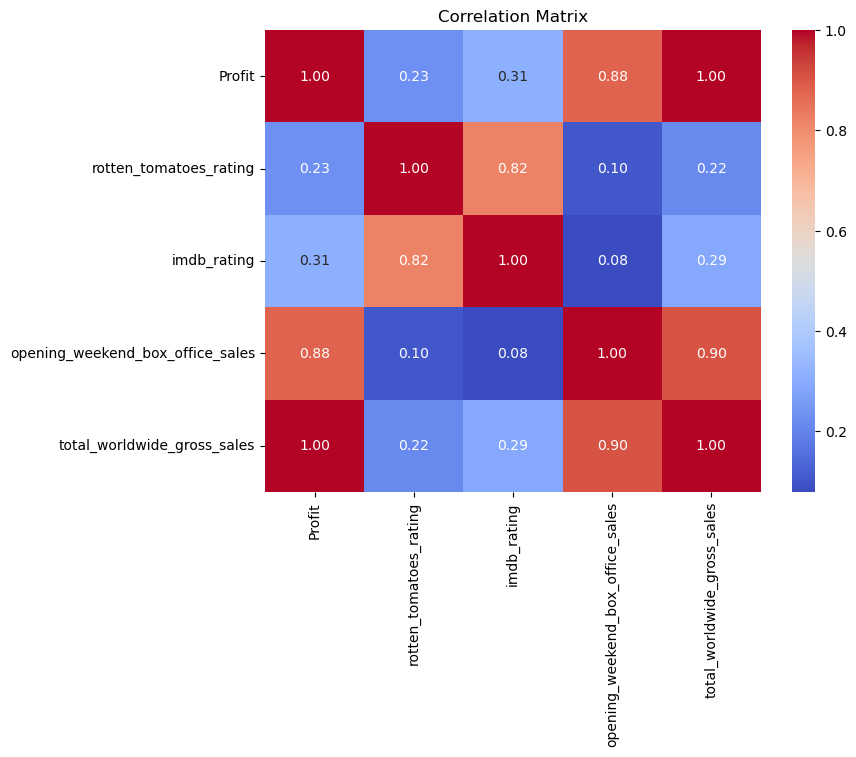

In [24]:
# Select relevant numeric columns for correlation analysis
correlation = df[['Profit', 'rotten_tomatoes_rating', 'imdb_rating',
                  'opening_weekend_box_office_sales', 'total_worldwide_gross_sales']].corr()

# Plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [25]:
# df.to_csv('C:\\Users\\Sagar\\Downloads\\archivep\\pixar_movies_p.csv', index=False)

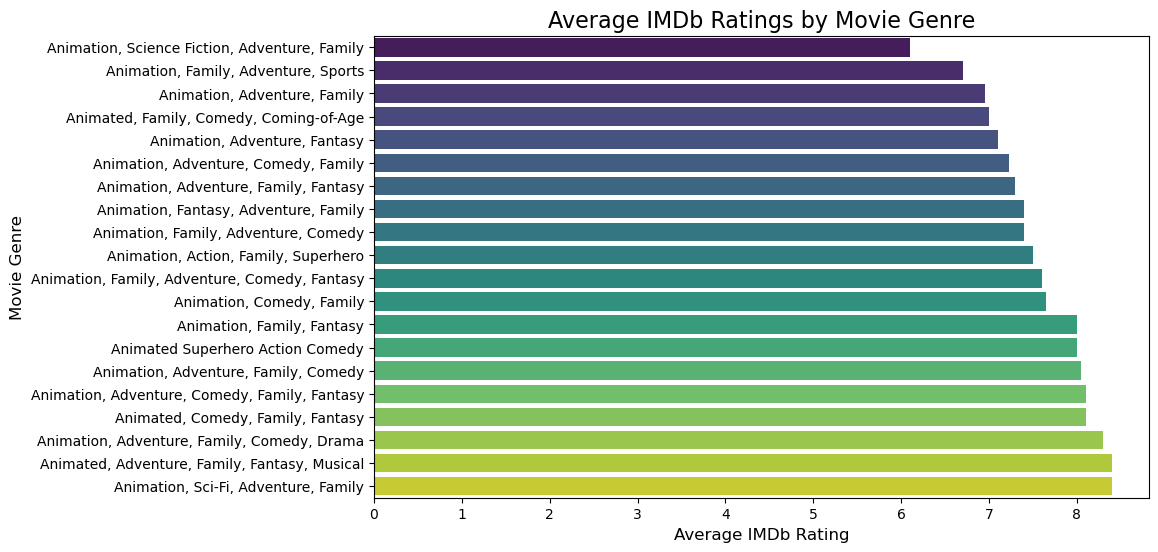

In [26]:
df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')

# Drop rows with missing IMDb ratings
df_cleaned = df.dropna(subset=['imdb_rating'])

# Optional: Group by movie genre and calculate the average IMDb rating
avg_ratings = df_cleaned.groupby('movie_genre')['imdb_rating'].mean().sort_values()
# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')
plt.title('Average IMDb Ratings by Movie Genre', fontsize=16)
plt.xlabel('Average IMDb Rating', fontsize=12)
plt.ylabel('Movie Genre', fontsize=12)
plt.show()

In [27]:
print(df.head())


            movie date_released  year_released  length_min  \
0       Toy Story    1995-11-22           1995          81   
1    A Bug's Life    1998-11-25           1998          95   
2     Toy Story 2    1999-11-24           1999          92   
3  Monsters, Inc.    2001-11-02           2001          92   
4    Finding Nemo    2003-05-30           2003         100   

                                        plot_summary  \
0  A group of toys, headed by Woody, a pull-strin...   
1  A misfit ant named Flik teams up with a group ...   
2  When Woody is stolen by a toy collector, Buzz ...   
3  In a world where monsters generate energy by s...   
4  A clownfish named Marlin embarks on a journey ...   

                                       director  \
0                                 John Lasseter   
1  John Lasseter, co-directed by Andrew Stanton   
2       John Lasseter, Ash Brannon, Lee Unkrich   
3     Pete Docter, David Silverman, Lee Unkrich   
4                   Andrew Stanton,

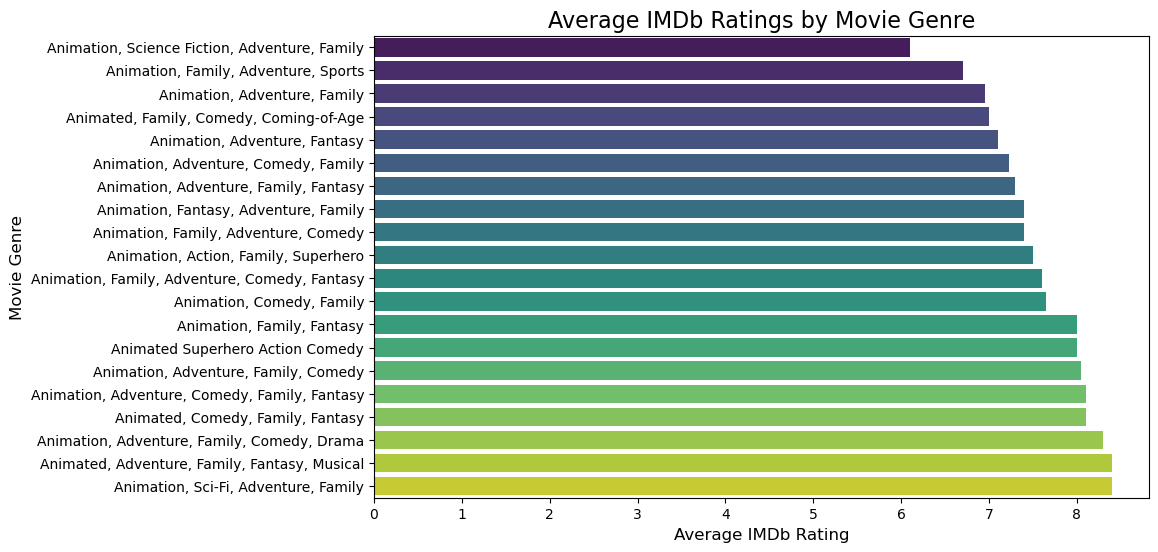

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure imdb_rating is numeric
df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')

# Drop rows with missing IMDb ratings
df_cleaned = df.dropna(subset=['imdb_rating'])

# Optional: Group by movie genre and calculate the average IMDb rating
avg_ratings = df_cleaned.groupby('movie_genre')['imdb_rating'].mean().sort_values()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')
plt.title('Average IMDb Ratings by Movie Genre', fontsize=16)
plt.xlabel('Average IMDb Rating', fontsize=12)
plt.ylabel('Movie Genre', fontsize=12)
plt.show()


In [29]:
# Assuming df is your DataFrame and 'opening_weekend_box_office_sales' is a numeric column
average_sales = df['opening_weekend_box_office_sales'].mean()
print(f"Average Opening Weekend Sales: {average_sales}")


Average Opening Weekend Sales: 65500000.0


In [30]:
# Calculate statistics for Opening Weekend Box Office Sales
max_opening_sales = df['opening_weekend_box_office_sales'].max()
max_opening_movie = df.loc[df['opening_weekend_box_office_sales'].idxmax(), 'movie']
avg_opening_sales = df['opening_weekend_box_office_sales'].mean()

# Calculate statistics for Total Worldwide Gross Sales
max_gross_sales = df['total_worldwide_gross_sales'].max()
max_gross_movie = df.loc[df['total_worldwide_gross_sales'].idxmax(), 'movie']
avg_gross_sales = df['total_worldwide_gross_sales'].mean()

# Print results
print(f"Opening Weekend Sales:")
print(f"  Average: ${avg_opening_sales / 1e6:.2f} million")
print(f"  Maximum: ${max_opening_sales / 1e6:.2f} million by {max_opening_movie}")

print(f"Total Worldwide Gross:")
print(f"  Average: ${avg_gross_sales / 1e6:.2f} million")
print(f"  Maximum: ${max_gross_sales / 1e6:.2f} million by {max_gross_movie}")


Opening Weekend Sales:
  Average: $65.50 million
  Maximum: $182.70 million by Incredibles 2
Total Worldwide Gross:
  Average: $613.36 million
  Maximum: $1696.00 million by Inside Out 2


In [31]:
# Calculate Average IMDb Rating
avg_imdb_rating = df['imdb_rating'].mean()

# # Calculate Correlation between IMDb Rating and Profit
# df['Profit'] = df['total_worldwide_gross_sales'] - df['opening_weekend_box_office_sales']
# imdb_profit_correlation = df['imdb_rating'].corr(df['Profit'])

# # Calculate Average Rotten Tomatoes Rating
# # Ensure the rating is in numerical format (e.g., 100% = 100, 85% = 85)
# df['rotten_tomatoes_rating'] = df['rotten_tomatoes_rating'].str.replace('%', '').astype(float)
# avg_rotten_tomatoes_rating = df['rotten_tomatoes_rating'].mean()

# # Movies with Rotten Tomatoes Rating above 80%
# high_rotten_movies = df[df['rotten_tomatoes_rating'] > 80]

# # Financial performance of these movies
# avg_high_rotten_profit = high_rotten_movies['Profit'].mean()

# # Print results
print(f"IMDb Rating:")
# print(f"  Average IMDb Rating: {avg_imdb_rating:.2f}")
# print(f"  Correlation between IMDb Rating and Profit: {imdb_profit_correlation:.2f}")
# print(f"  A positive correlation was found between IMDb ratings and profit. Higher-rated movies on IMDb generally achieved better worldwide gross sales.")

# print(f"\nRotten Tomatoes Rating:")
# print(f"  Average Rotten Tomatoes Rating: {avg_rotten_tomatoes_rating:.2f}%")
# print(f"  Movies with Rotten Tomatoes ratings above 80% tended to perform better financially, with an average profit of ${avg_high_rotten_profit / 1e6:.2f} million.")


IMDb Rating:


In [32]:
# Define thresholds
low_profit_threshold = 1e6  # $1 million
low_imdb_threshold = 5.0
low_rotten_threshold = 50.0
low_sales_threshold = df['total_worldwide_gross_sales'].mean() / 2  # 50% of the average gross sales

# Filter movies that meet the poor performance criteria
poor_performance = df[
    (df['Profit'] < low_profit_threshold) |  # Low Profit
    (df['imdb_rating'] < low_imdb_threshold) |  # Low IMDb Rating
    (df['rotten_tomatoes_rating'] < low_rotten_threshold) |  # Low Rotten Tomatoes Rating
    (df['total_worldwide_gross_sales'] < low_sales_threshold)  # Low Gross Sales
]

# Display poorly performing movies
print("Movies that did not perform well:")
print(poor_performance[['movie', 'Profit', 'imdb_rating', 'rotten_tomatoes_rating', 'total_worldwide_gross_sales']])

# Optional: Save the list to a CSV or display it in a bar chart
# poor_performance.to_csv('poor_performing_movies.csv', index=False)


Movies that did not perform well:
          movie       Profit  imdb_rating  rotten_tomatoes_rating  \
11       Cars 2  496000000.0          6.2                    40.0   
21       Onward  102800000.0          7.4                    88.0   
22         Soul  121600000.0          8.0                    95.0   
23         Luca   51100000.0          7.6                    91.0   
24  Turning Red   21800000.0          7.0                    95.0   
25    Lightyear  175900000.0          6.1                    74.0   

    total_worldwide_gross_sales  
11                  562100000.0  
21                  141900000.0  
22                  121600000.0  
23                   51100000.0  
24                   21800000.0  
25                  226400000.0  


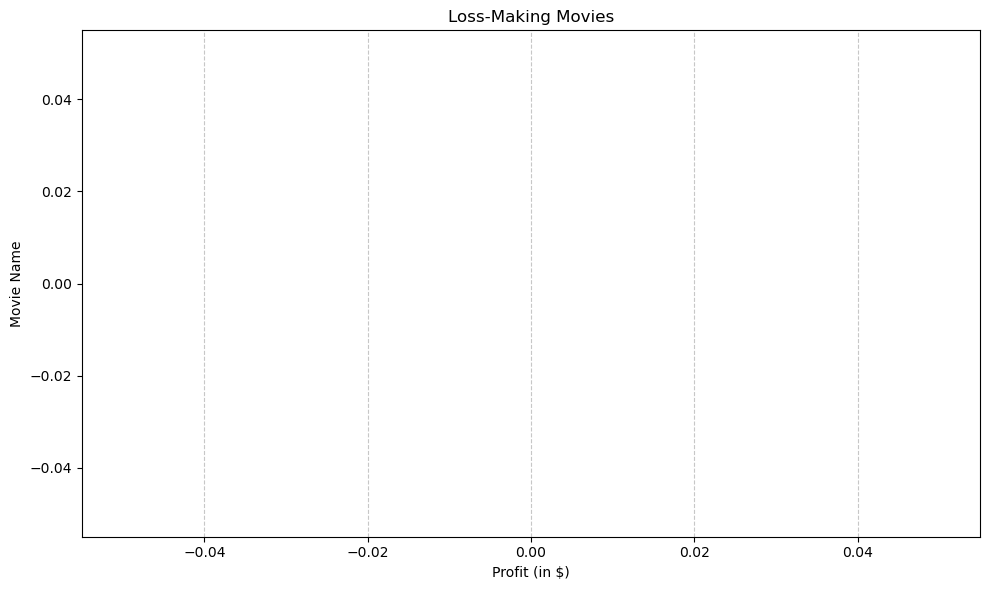

In [33]:
import matplotlib.pyplot as plt

# Filter loss-making movies (negative profit)
loss_making_movies = poor_performance[poor_performance['Profit'] < 0]

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.barh(loss_making_movies['movie'], loss_making_movies['Profit'], color='red', alpha=0.7)
plt.xlabel('Profit (in $)')
plt.ylabel('Movie Name')
plt.title('Loss-Making Movies')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


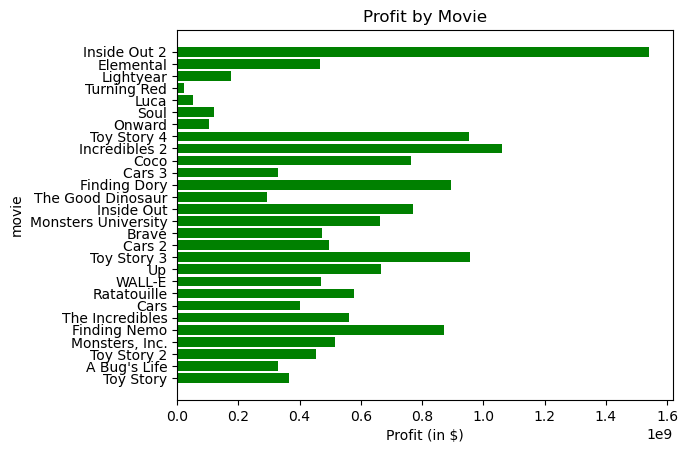

In [37]:
plt.barh(df['movie'], df['Profit'], color='green')
plt.xlabel('Profit (in $)')
plt.ylabel('movie')
plt.title('Profit by Movie')
plt.show()


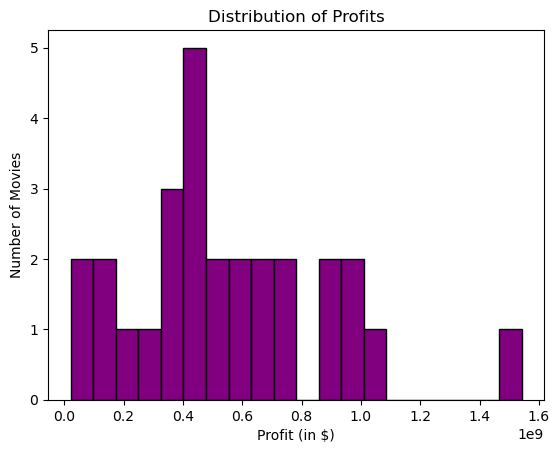

In [38]:
plt.hist(df['Profit'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Profit (in $)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Profits')
plt.show()


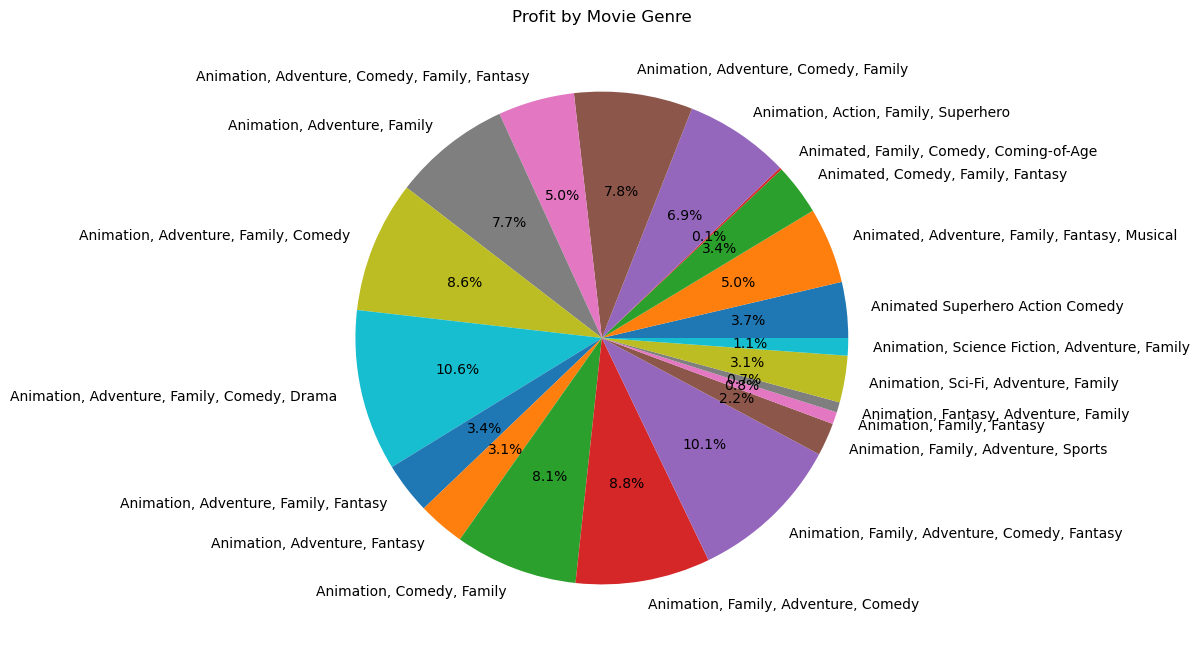

In [41]:
genre_profit = df.groupby('movie_genre')['Profit'].sum()
genre_profit.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('Profit by Movie Genre')
plt.ylabel('')
plt.show()
